In [6]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [111]:
class ImagePreprocessor:
    def __init__(self):
        self.folder = "/Users/akhil/Documents/Machine learning/Datasets/Cat vs Dog classifier/train"
        self.dict = {0: 'Cat', 1: ' Dog'}
    def load_data(self):
        images = []
        for file_name in os.listdir(self.folder):
            if file_name.split(".")[0] == "cat":
                image = cv2.imread(self.folder+"/"+file_name)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append([image, 0])
            else:
                image = cv2.imread(self.folder+"/"+file_name)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append([image, 1])
        return images
    
    def plot_image(self, image):
        plt.imshow(image[0])
        plt.title(self.dict[image[1]])
        plt.show()

    def plot_subplots(self, rows, cols, images):
        fig, ax = plt.subplots(rows, cols, figsize = (10,10))
        axes = ax.ravel()

        for idx, ax in enumerate(axes):
            self.draw_rectangle(images[idx])
            ax.imshow(images[idx][0])
            ax.set_title(images[idx][1])
    
    def draw_rectangle(self,image):
        cv2.rectangle(image[0][0], (200, 200), (400,400), 10, 2)

    def draw_circle(self,image):
        cv2.circle(image[0],(100,100), 100, (255, 0, 0), -1)

    def draw_polygon(self,image):
        pts = np.array([[25, 70], [25, 145],
                [75, 190], [150, 190],
                [200, 145], [200, 70],
                [150, 25], [75, 25]],
               np.int32)
 
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image[0], pts, True, (255, 0, 0), -1)
        

In [106]:
preprocessor = ImagePreprocessor()


In [112]:
# load data
images = preprocessor.load_data()

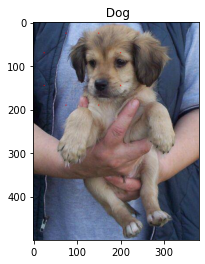

In [113]:
preprocessor.draw_polygon(images[0])
preprocessor.plot_image(images[0])